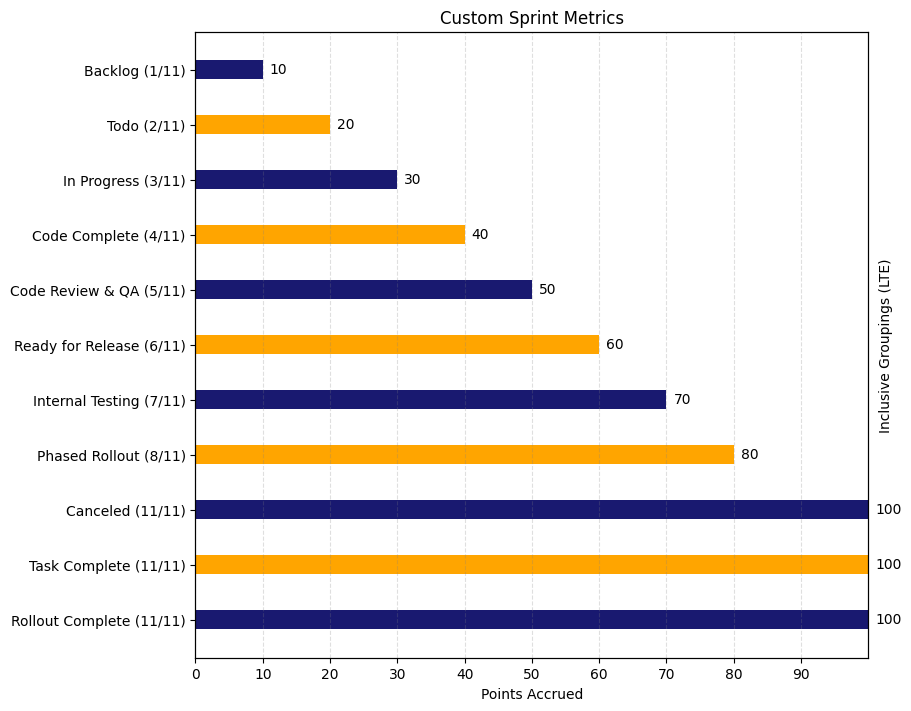

In [48]:
import matplotlib.pyplot as plt

statuses = [
    "Backlog",
    "Todo",
    "In Progress",
    "Code Complete",
    "Code Review & QA",
    "Ready for Release",
    "Internal Testing",
    "Phased Rollout",
    "Rollout Complete",
    "Task Complete",
    "Canceled",
]
MAX_RANK = len(statuses)
rankings = {
    "Backlog":           1,
    "Todo":              2,
    "In Progress":       3,
    "Code Complete":     4,
    "Code Review & QA":  5,
    "Ready for Release": 6,
    "Internal Testing":  7,
    "Phased Rollout":    8,
    "Rollout Complete":  MAX_RANK,
    "Task Complete":     MAX_RANK,
    "Canceled":          MAX_RANK,
}

class Grouping:
    def __init__(self, name, points):
        self.name = name
        self.points = points
        self.rank = rankings[name]
    @property
    def label(self):
        return f"{self.name} ({self.rank}/{MAX_RANK})"

##################### <EXAMPLE>
_groupings = sorted([
    Grouping("Backlog", 10),
    Grouping("Todo", 20),
    Grouping("In Progress", 30),
    Grouping("Code Complete", 40),
    Grouping("Code Review & QA", 50),
    Grouping("Ready for Release", 60),
    Grouping("Internal Testing", 70),
    Grouping("Phased Rollout", 80),
    Grouping("Rollout Complete", 100),
    Grouping("Task Complete", 100),
    Grouping("Canceled", 100),
], key=lambda g: -g.rank)
_total_points = 100
##################### </EXAMPLE>

def render_chart(groupings, total_points):
    fig, ax1 = plt.subplots(figsize=(9, 7), layout='constrained')
    fig.canvas.manager.set_window_title('Custom Sprint Metrics')

    labels = list(map(lambda g: g.label, groupings))
    points = list(map(lambda g: g.points, groupings))
    
    ax1.set_title("Custom Sprint Metrics")
    ax1.set_xlabel('Points Accrued')
    rects = ax1.barh(labels, points, align='center', height=0.35, color=["midnightblue", "orange"])
    ax1.set_xlim([0, total_points])
    ax1.set_xticks(list(range(0, total_points, 10)))
    ax1.xaxis.grid(
        True,
        linestyle='--',
        which='major',
        color='grey',
        alpha=.25)
    ax1.bar_label(
        rects,
        points,
        padding=5,
        color='black')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Inclusive Groupings (LTE)')
    ax2.set_yticks([])
    plt.show()

render_chart(_groupings, _total_points)